<a href="https://colab.research.google.com/github/fernandabomtorin16/reconhecimento_facial/blob/main/reconhecimento_facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading dados tratados

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import matplotlib.pyplot as plt
import html
import pandas as pd
import seaborn as sns
from google.colab import files
import os
import pickle as pk

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# <font face="Verdana" size=6 color='#6495ED'>   LFW

*Labeled Faces in the Wild* (LFW) é um banco de dados de fotografias de rostos projetado para estudar o problema do reconhecimento facial. Atualmente, quatro conjuntos diferentes de imagens LFW,  incluindo o original e três tipos diferentes de imagens "alinhadas". De acordo com os pesquisadores, as imagens com alinhamento tipo afunilamento profundo (*deep funneling*) produziram resultados superiores para a maioria dos algoritmos de verificação de rosto em comparação com os outros tipos de imagem. Portanto, o conjunto de dados carregado aqui é essa versão.

<center><img src='https://drive.google.com/uc?export=view&id=1IGeppDQn5xMl8k1uidUjTqahKPT7n0dt' width="400"></center>

<small> Imagem extraída do [link](https://github.com/dribnet/lfw_fuel).

Abaixo, o conjunto de dados de pessoas LFW é carregado. Os principais parâmetros são `min_faces_per_person` e `resize`. O primeiro parâmetro indica o mínimo de imagens que uma pessoa deve ter para ser selecionada para o dataset e o segundo parâmetro indica a proporção na qual a imagem é redimensionada.
```
lfw_people = fetch_lfw_people(resize=1.0)
```

As imagens são $125 \times 94 = 11750$. Você pode, por exemplo,
escolher um `resize` de 0.5, que leva a uma dimensão total de $62\times 47 = 2914$ para cada ponto do espaço (imagem). Além disso, a escolha default  `min_faces_per_person = None` levou a um conjunto de 13233 imagens no total.

In [ ]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(resize=1.0)

Perceba com o código abaixo que a variável `lfw_people.images` contém os dados referentes às imagens e a variável `lfw_people.target` contém um número referente à identificação da imagem (0-5748). A conexão entre os números usados na identificação e o nome de cada pessoa é obtida através da variável `lfw_people.target_names`.

A matriz 2D `lfw_people.data` contém o número de linhas equivalente ao número de imagens e o número de colunas equivalente à dimensão (número de características) de cada imagem.

O dataset contém  13233 imagens de dimensões  125 por 94
Portanto, o número de características (dimensão) de cada imagem é 125 x 94 = 11750
Portanto, todos os dados estão resumidos em uma matriz de 13233 linhas por 11750 colunas.

Cada uma das imagens tem um número de identificação. Os números estão armazenados em um vetor de dimensão 13233:
[5360 3434 3807 ... 2175  373 2941]

O número direciona a imagem a uma das 5749 pessoas diferentes existentes no dataset. São elas:
['AJ Cook' 'AJ Lamas' 'Aaron Eckhart' ... 'Zumrati Juma' 'Zurab Tsereteli'
 'Zydrunas Ilgauskas']



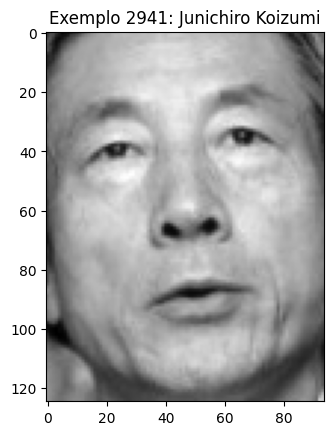

In [ ]:
cont_imagens, altura_lfw, largura_lfw = lfw_people.images.shape
n_classes = lfw_people.target_names.shape[0]

print(f'O dataset contém ',cont_imagens, 'imagens de dimensões ', altura_lfw, 'por', largura_lfw)
print(f'Portanto, o número de características (dimensão) de cada imagem é {altura_lfw} x {largura_lfw} = {lfw_people.data.shape[1]}')
print(f'Portanto, todos os dados estão resumidos em uma matriz de {lfw_people.data.shape[0]} linhas por {lfw_people.data.shape[1]} colunas.\n')

print(f'Cada uma das imagens tem um número de identificação. Os números estão armazenados em um vetor de dimensão {lfw_people.target.shape[0]}:')
print(f'{lfw_people.target}\n' )

print(f'O número direciona a imagem a uma das {n_classes} pessoas diferentes existentes no dataset. São elas:')
target_names = lfw_people.target_names
print(f'{target_names}\n')

plt.imshow(lfw_people.images[-1], cmap='gray')
name_ex = lfw_people.target_names[lfw_people.target[-1]]

plt.title('Exemplo '+str(lfw_people.target[-1])+': '+str(name_ex))
plt.show()


Junichiro Koizumi foi um político japonês que serviu como Primeiro-Ministro do Japão de 2001 a 2006. Ele é conhecido por suas políticas reformistas e estilo de liderança carismático. Koizumi nasceu em 8 de janeiro de 1942, em Yokosuka, na província de Kanagawa. Ele ingressou na política seguindo os passos de seu pai e avô, ambos políticos influentes.

### Fotos reais da turma

Loading das fotos tratadas da turma

In [ ]:
# Construa o caminho completo do arquivo
file_path = '/content/drive/MyDrive/AprendizadoMaquinasI/2025/ThisIsMe/Dataset/'

# Verifique se o diretório existe, se não, crie-o
dir_path = os.path.dirname(file_path)
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

In [ ]:
# Abrir os arquivos
with open(file_path+'turma_data.pkl', 'rb') as pickle_file:
  turma_data = pk.load(pickle_file)

with open(file_path+'turma_target.pkl', 'rb') as pickle_file:
  turma_target = pk.load(pickle_file)

with open(file_path+'turma_target_names.pkl', 'rb') as pickle_file:
  turma_target_names = pk.load(pickle_file)

with open(file_path+'turma_image.pkl', 'rb') as pickle_file:
  turma_images = pk.load(pickle_file)

In [ ]:
turma_data = np.array(turma_data)
turma_target = np.array(turma_target)
print(f'Nossos dados de entrada estão em uma matriz {turma_data.shape} nomeada de turma_data.')
print(f'Nossos dados de saída estão em um vetor {turma_target.shape} nomeado de turma_target.')

Nossos dados de entrada estão em uma matriz (712, 11750) nomeada de turma_data.
Nossos dados de saída estão em um vetor (712,) nomeado de turma_target.


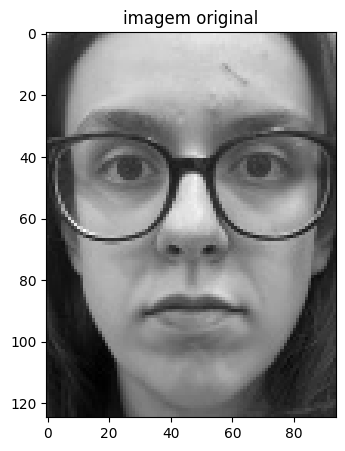

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(turma_data[708].reshape(altura_lfw, largura_lfw), cmap='gray')
plt.title('imagem original')
plt.show()

# <font face="Verdana" size=6 color='#6495ED'> AGORA É COM VOCÊ ...

Seria interessante aplicar PCA para reduzir a dimensão dos pontos de `lfw_people.data` a uma dimensão de `n_PC` componentes retendo-se o *máximo* de informação possível. Verifique, através da plotagem da porcentagem de variação explicada acumulada, qual o valor razoável para `n_PC`. Para encontrar as direções principais, passe o parâmetro `n_components=n_PC` no construtor de `PCA` e crie uma nova decomposição de `lfw_people.data` com o método `fit`.

Depois, os dados projetados no novo espaço de dimensão reduzida são obtidos a partir de pontos no espaço original com o método `transform` (naturalmente aqui há alguma perda de informação).

Para você e seu grupo:

1. Criem o dataset:
 * `data_images` com as imagens da turma adicionadas ao `lfw_people.images`
 * `data` com os dados adicionados à lista `lfw_people.data`
 * `data_target`, acrescente mais números em `lfw_people.target`
 * `data_names`, acrescente os nomes em `lfw_people.target_names`


2. Calculem o PCA;
3. Plotem o gráfico da variância explicada acumulada e, baseando-se no gráfico, escolham um número de componentes principais a ser adotado;
4. Plotem o *rosto médio*. Uma parte interessante do PCA é que ele calcula o *rosto médio*, que pode ser interessante examinar. Isso pode ser calculado com `pca.mean_`. Este rosto mostrará a média para cada dimensão de todas as imagens no conjunto de dados. Portanto, ele efetivamente mostra um rosto MÉDIO refletindo todos os rostos no conjunto de dados.
5. Projetem o  __i-ésimo ponto__ `lfw_people.data[i]` (lembrem-se que os valores devem estar na forma de vetor linha e, portanto, dimensão de $1 \times 11750$ ) nas CPs e os projetem novamente no espaço original. Usem diferentes quantidades de componentes principais `n_PC` e vejam o quanto de informação é perdida para um baixo número de componentes consideradas. Verifiquem também, que a medida que o número de componentes consideradas cresce, a imagem recuperada se aproxima da imagem original. Um ponto do espaço original recuperado pode ser obtido a partir do espaço reduzido com o método `inverse_transform`.
6. Apenas para ilustração, remodelem as componentes principais e definam como `eigenfaces`, que é o nome dado a um conjunto de autovetores quando usado no problema de visão computacional de reconhecimento de rosto humano. Vejam que quando PCA é aplicado a dimensão de cada uma das `n_PC` componentes é de 11750 e, para mostrar a imagem,  devem remodelar o vetor para dimensão de `altura_lfw` ($125$) vs `largura_lfw` ($94$):

`eigenfaces = pca.components_.reshape((n_PC, altura_lfw, largura_lfw))`

7. Plotem as primeiras (20, por exemplo) eigenfaces e resumam suas conclusões.
8. É interessante notar que o espaço das eigenfaces não é útil apenas para representar rostos humanos, mas também pode ser usado para aproximar um cachorro (Fig. `doguito.png`) ou um cappuccino (Fig. `capuccino.png`). Vocês devem testar. Isso é possível porque as 1600 eigenfaces abrangem um grande subespaço do espaço de imagem de 32256 dimensões, correspondendo a características espaciais amplas, suaves e não localizadas, como bochechas, testa, bocas, etc.
9. Salvem os dados do PCA.

# Modelo para reconhecimento facial

Criação de um modelo de classificação para o reconhecimento de fotos de 35 pessoas diferentes, representadas por diversas fotos coletadas na base de dados.

Foi utilizado um PCA para a redução de dimensionalidade das fotos presentes na base de dados, mantendo 99,9% da variança presente nas features originais.

Foi realizado um data augmentation para enriquecimento da base de treinamento do modelo de classificação, de forma a melhorar o aprendizado do modelo.

Após isso, utiliza-se um modelo SVM para a criação do modelo de classificação multiclass. Para a otimização de hiperparametros, utiliza-se um grid search.

### **PCA**
1) Criação do dataset utilizando imagens de lfw_people

2) Calculo do PCA

3) Compreensão do gráfico da variância explicada acumulada e escolham um número de componentes principais a ser adotado

4) Plot do rosto médio. Este rosto mostrará a média para cada dimensão de todas as imagens no conjunto de dados. Portanto, ele efetivamente mostra um rosto MÉDIO refletindo todos os rostos no conjunto de dados.

5) Projeção do i-ésimo ponto lfw_people.data[i] e comparação com diferentes quantidades de componentes principais n_PC, mostrando o quanto de informação é perdida para um baixo número de componentes consideradas, e conforme é aumentado o numero de componentes, observa-se maior semelhança com a imagem original.

6) Refatoração do modelo utilizando as componentes principais com n_PC = 426 (mantido 99,9% da variança) e definição como eigenfaces, que é o nome dado a um conjunto de autovetores quando usado no problema de visão computacional de reconhecimento de rosto humano.

7) Plote das 20 primeiras eigenfaces.

8) Salvamento do PCA.

In [ ]:
lfw_people.data[0]

array([0.15947713, 0.17124183, 0.15294118, ..., 0.10196079, 0.09411765,
       0.08627451], dtype=float32)

In [ ]:
# Criação do dataset
data_images = np.concatenate((lfw_people.images, turma_images), axis=0)
data = np.concatenate((lfw_people.data, turma_data), axis=0)
data_target = np.concatenate((lfw_people.target, turma_target), axis=0)
data_names = np.concatenate((lfw_people.target_names, turma_target_names), axis=0)

In [ ]:
from sklearn.decomposition import PCA
# Aplicar PCA
pca = PCA()
pca.fit(data)

PCA()

In [ ]:
print(f"Número de componentes principais gerados: {pca.n_components_}")

Número de componentes principais gerados: 11750


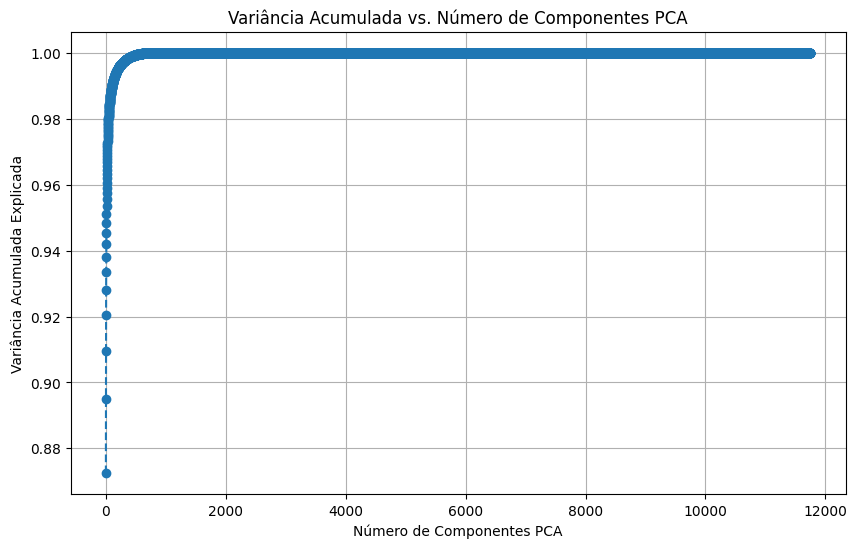

In [ ]:
# Calcular a variância acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotar a variância acumulada vs. o número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Variância Acumulada vs. Número de Componentes PCA')
plt.xlabel('Número de Componentes PCA')
plt.ylabel('Variância Acumulada Explicada')
plt.grid(True)
plt.show()

In [ ]:
for i, j in enumerate(cumulative_variance):
  if j > 0.999:
    print(f'A partir de {i+1} componentes, mais de {j} da variancia é explicada')
    break

A partir de 426 componentes, mais de 0.9990012049674988 da variancia é explicada


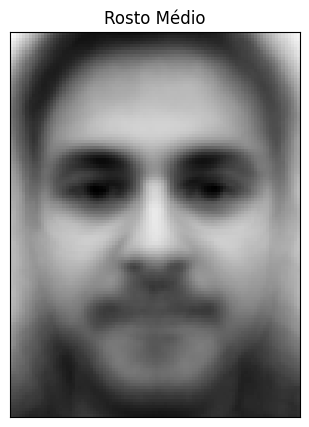

In [ ]:
# Plotar o rosto médio
plt.figure(figsize=(5, 5))
plt.imshow(pca.mean_.reshape(altura_lfw, largura_lfw), cmap='gray')
plt.title('Rosto Médio')
plt.xticks(())
plt.yticks(())
plt.show()

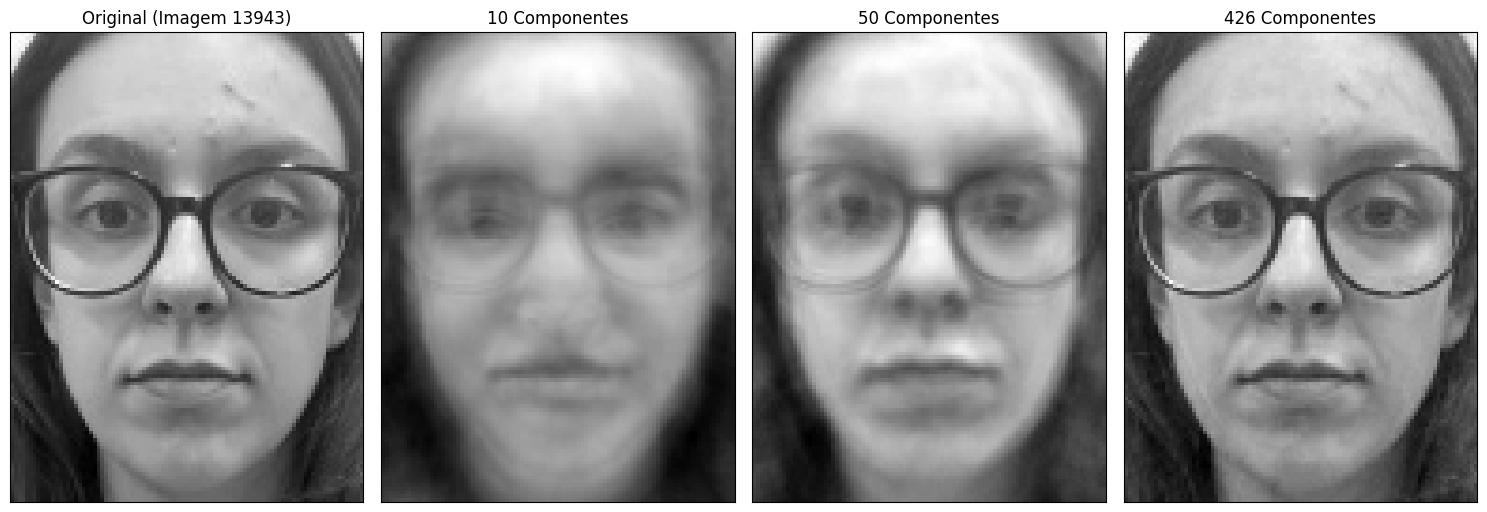

Observações sobre a perda de informação:
Com um baixo número de componentes principais, a imagem reconstruída é mais borrada e menos detalhada.
À medida que o número de componentes principais aumenta, a imagem reconstruída se torna mais nítida e se aproxima mais da imagem original.


In [ ]:
# Projetar e reconstruir um ponto usando diferentes números de componentes principais
i = 13943  # Índice do ponto a ser projetado e reconstruído (primeira imagem do lfw_people)
point_to_project = data[i].reshape(1, -1) # Certificar-se que é um vetor linha

n_PCs_to_test = [10, 50, 426] # Diferentes quantidades de componentes principais para testar

plt.figure(figsize=(15, 5))
plt.subplot(1, len(n_PCs_to_test) + 1, 1)
plt.imshow(data_images[i], cmap='gray')
plt.title(f'Original (Imagem {i})')
plt.xticks(())
plt.yticks(())

for j, n_PC in enumerate(n_PCs_to_test):
  # Aplicar PCA com n_PC componentes
  pca_n = PCA(n_components=n_PC)
  pca_n.fit(data)

  # Projetar o ponto no espaço reduzido
  projected_point = pca_n.transform(point_to_project)

  # Projetar o ponto de volta no espaço original
  reconstructed_point = pca_n.inverse_transform(projected_point)

  # Remodelar o ponto reconstruído para exibir como imagem
  reconstructed_image = reconstructed_point.reshape(altura_lfw, largura_lfw)

  # Plotar a imagem reconstruída
  plt.subplot(1, len(n_PCs_to_test) + 1, j + 2)
  plt.imshow(reconstructed_image, cmap='gray')
  plt.title(f'{n_PC} Componentes')
  plt.xticks(())
  plt.yticks(())

plt.tight_layout()
plt.show()

print("Observações sobre a perda de informação:")
print("Com um baixo número de componentes principais, a imagem reconstruída é mais borrada e menos detalhada.")
print("À medida que o número de componentes principais aumenta, a imagem reconstruída se torna mais nítida e se aproxima mais da imagem original.")


As 426 eigenfaces têm dimensão de 125x94.


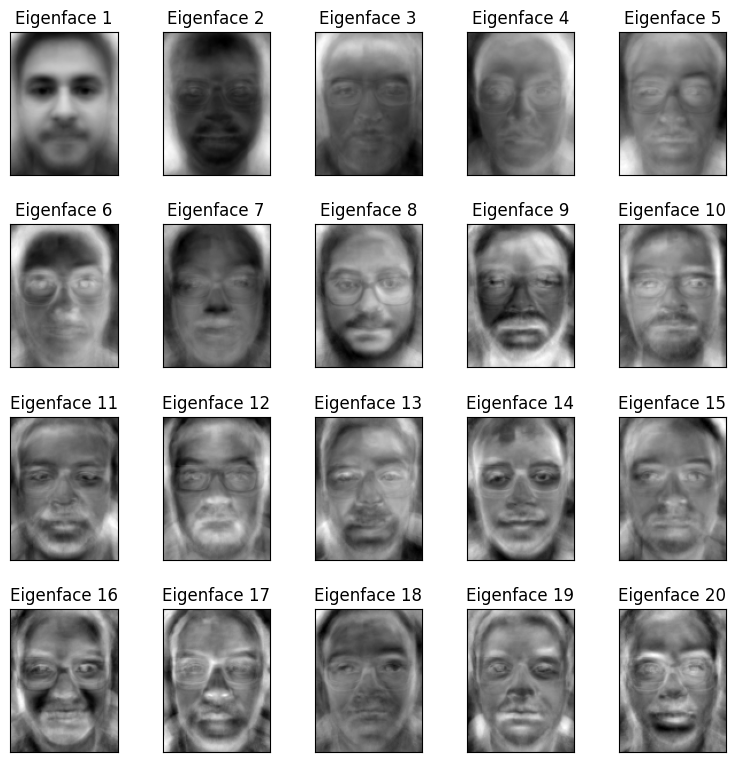

In [ ]:
# Remodelar as componentes principais para Eigenfaces
n_PC = 426

# Recalcular PCA com o número escolhido de componentes
pca = PCA(n_components=n_PC)
pca.fit(data)

# Remodelar as componentes principais para ter o formato de imagem
eigenfaces = pca.components_.reshape((n_PC, altura_lfw, largura_lfw))

print(f'As {n_PC} eigenfaces têm dimensão de {altura_lfw}x{largura_lfw}.')

# Plotar as primeiras 20 eigenfaces
n_row = 4
n_col = 5
plt.figure(figsize=(1.5 * n_col, 2 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(min(n_PC, n_row * n_col)):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.xticks(())
    plt.yticks(())

plt.show()

In [ ]:
# Salvar os dados do PCA
# Caminho para salvar os arquivos no Google Drive
save_path = '/content/drive/MyDrive/AprendizadoMaquinasI/2025/PCA_Results/'

# Verifica se o diretório existe, se não, cria
os.makedirs(save_path, exist_ok=True)

# Salvar o objeto PCA treinado (inclui mean_, components_, explained_variance_ratio_)
with open(save_path + 'pca_model.pkl', 'wb') as f:
    pk.dump(pca, f)

# Salvar os dados transformados (os dados projetados no espaço das componentes principais)
# Transformar todos os dados originais (lfw_people + turma) usando o PCA treinado
data_pca = pca.transform(data)

with open(save_path + 'data_pca_transformed.pkl', 'wb') as f:
    pk.dump(data_pca, f)

# Opcional: Salvar a variância explicada e os nomes
with open(save_path + 'cumulative_variance.pkl', 'wb') as f:
    pk.dump(cumulative_variance, f)

# Salvar os nomes dos targets originais (para referência)
with open(save_path + 'data_names.pkl', 'wb') as f:
    pk.dump(data_names, f)


print(f"Dados do PCA salvos em: {save_path}")
print("pca_model.pkl: Objeto PCA treinado")
print("data_pca_transformed.pkl: Dados originais projetados no espaço PCA")
print("cumulative_variance.pkl: Variância explicada acumulada")
print("data_names.pkl: Nomes das pessoas correspondentes aos targets")

Dados do PCA salvos em: /content/drive/MyDrive/AprendizadoMaquinasI/2025/PCA_Results/
pca_model.pkl: Objeto PCA treinado
data_pca_transformed.pkl: Dados originais projetados no espaço PCA
cumulative_variance.pkl: Variância explicada acumulada
data_names.pkl: Nomes das pessoas correspondentes aos targets


### **Modelo de Classificação Multiclass**

Criação do modelo de classificação multiclass utilizando SVM, a partir dos dados gerados pelo PCA. Foi realizado um data augmentation e otimização de hiperparametros utilizando grid search, afim de melhoria na performance do modelo.


#### _Data Augmentation + Data Prep_

In [ ]:
image_files = []
base_dir = '/content/drive/MyDrive/ThisIsMe'

# Verifica se o diretório base existe
if os.path.exists(base_dir):
  # Itera sobre todas as subpastas dentro do diretório base
  for root, dirs, files in os.walk(base_dir):
    for file in files:
      # Verifica se o arquivo tem a extensão .jpg ou .jpeg (case-insensitive)
      if file.lower().endswith(('.jpg', '.jpeg')):
        # Adiciona o caminho completo do PRIMEIRO arquivo encontrado à lista
        image_files.append(os.path.join(root, file))
else:
  print(f"O diretório base '{base_dir}' não existe.")

In [ ]:
# Data augmentation
import tensorflow as tf

imagens = [] # This will now store all augmented images
image_target_names = []

for i in image_files:
  image_org = cv2.imread(i)  # Carrega no formato BGR (OpenCV padrão)
  image_rgb = cv2.cvtColor(image_org, cv2.COLOR_BGR2RGB)
  image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)  # Shape: (altura, largura)

  # Adicionar canal para ficar (altura, largura, 1)
  image_gray = np.expand_dims(image_gray, axis=-1)  # Novo shape: (altura, largura, 1)
  image_gray = image_gray.astype('float32') / 255.0  # Normalizar [0, 1]

  datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      zoom_range=0.2,
      rotation_range=3.0,
      fill_mode='nearest'
  )

  augmented_images_for_this_file = []
  # Generate 8 augmented images for each original image
  for _ in range(15):
    # random_transform expects a single image (height, width, channels)
    aug_img = datagen.random_transform(image_gray)
    augmented_images_for_this_file.append(aug_img)

  # Extend the main list with augmented images from the current file
  imagens.extend(augmented_images_for_this_file)
  image_target_names.extend([i.split('/')[-2]] * len(augmented_images_for_this_file))

print(f"Generated {len(imagens)} augmented images.")

Generated 10680 augmented images.


In [ ]:
aug_data = np.array(imagens).reshape(len(imagens),-1)
aug_images = np.array(imagens)
aug_target_name = np.array(image_target_names)

In [ ]:
# Juntando augmentation com os outros dados
turma_data_aug = np.concatenate((turma_data, aug_data), axis=0)
aug_images_squeezed = np.squeeze(aug_images, axis=-1)
turma_images_aug = np.concatenate((turma_images, aug_images_squeezed), axis=0)

In [ ]:
distintos = np.unique(turma_target)

# Associando os valores da target com os nomes refernte a pessoa representada na imagem
dict_target_name = {}
for target, name in zip(distintos, turma_target_names):
  dict_target_name[target] = name

In [ ]:
aug_target = np.array([list(dict_target_name.keys())[list(dict_target_name.values()).index(name)] for name in aug_target_name])
print("Generated aug_target based on aug_target_name and dict_target_name.")
print(f"Shape of aug_target: {aug_target.shape}")

Generated aug_target based on aug_target_name and dict_target_name.
Shape of aug_target: (10680,)


In [ ]:
turma_target_aug = np.concatenate((turma_target, aug_target), axis=0)
turma_target_names_aug = np.concatenate((turma_target_names, aug_target_name), axis=0)

In [ ]:
turma_data.shape

(712, 11750)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(turma_data_aug, turma_target_aug, test_size=0.2, random_state=42)

In [ ]:
distintos_y_train = np.unique(y_train)
distintos_y_test = np.unique(y_test)

print("Distintos em turma_target:", len(distintos))
print("Distintos em y_train:", len(distintos_y_train))
print("Distintos em y_test:", len(distintos_y_test))

Distintos em turma_target: 35
Distintos em y_train: 35
Distintos em y_test: 35


In [ ]:
counts = np.bincount(y_train)

# Imprimir a contagem para cada valor distinto presente em y_train
print("Contagem de cada valor distinto em y_train:")
for valor in distintos_y_train:
    # Certifique-se de que o índice 'valor' existe no array 'counts'
    if valor < len(counts):
        print(f"Valor {valor}: {counts[valor]} vezes")
    else:
        print(f"Valor {valor}: 0 vezes (Não apareceu em y_train, mas estava nos distintos originais)")

Contagem de cada valor distinto em y_train:
Valor 0: 250 vezes
Valor 1: 269 vezes
Valor 2: 222 vezes
Valor 3: 403 vezes
Valor 4: 267 vezes
Valor 5: 249 vezes
Valor 6: 223 vezes
Valor 7: 229 vezes
Valor 8: 221 vezes
Valor 9: 270 vezes
Valor 10: 259 vezes
Valor 11: 260 vezes
Valor 12: 261 vezes
Valor 13: 262 vezes
Valor 14: 262 vezes
Valor 15: 229 vezes
Valor 16: 259 vezes
Valor 17: 261 vezes
Valor 18: 259 vezes
Valor 19: 266 vezes
Valor 20: 262 vezes
Valor 21: 245 vezes
Valor 22: 256 vezes
Valor 23: 237 vezes
Valor 24: 239 vezes
Valor 25: 253 vezes
Valor 26: 250 vezes
Valor 27: 295 vezes
Valor 28: 398 vezes
Valor 29: 262 vezes
Valor 30: 238 vezes
Valor 31: 254 vezes
Valor 32: 255 vezes
Valor 33: 251 vezes
Valor 34: 237 vezes


Desta forma, garante-se que não há pessoas que aparecem poucas vezes na base de treino.

#### _Modelo SVM_

In [ ]:
# Carregar o objeto PCA salvo
save_path = '/content/drive/MyDrive/AprendizadoMaquinasI/2025/PCA_Results/'

try:
    with open(save_path + 'pca_model.pkl', 'rb') as f:
        pca = pk.load(f)
    print("Objeto PCA carregado com sucesso!")
    print(f"Número de componentes carregados: {pca.n_components_}")
except FileNotFoundError:
    print(f"Erro: O arquivo 'pca_model.pkl' não foi encontrado no diretório {save_path}")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o objeto PCA: {e}")

Objeto PCA carregado com sucesso!
Número de componentes carregados: 426


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir o modelo SVM
svm = SVC(kernel='rbf', class_weight='balanced') # Usando kernel RBF e class_weight para lidar com classes desbalanceadas

# Definir os parâmetros para o GridSearchCV
param_grid = {
    'C': [1e3, 5e3, 1e4, 5e4, 1e5],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}

# Criar o objeto GridSearchCV
# cv=5 indica validação cruzada com 5 folds
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Aplicação do PCA para os dados de treino e teste
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Iniciando o GridSearchCV...")
# Treinar o modelo SVM com GridSearchCV usando os dados de treino da turma projetados no espaço PCA
grid_search.fit(X_train_pca, y_train)

print("GridSearchCV concluído.")
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada:")
print(grid_search.best_score_)

# O modelo otimizado está disponível em grid_search.best_estimator_
best_svm_model = grid_search.best_estimator_

# Avaliar o modelo no conjunto de teste
y_pred = best_svm_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia no conjunto de teste: {accuracy}")

Iniciando o GridSearchCV...


In [ ]:
# Função para o calculo das metricas de avaliação do modelo
from scipy.stats import ks_2samp
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

def get_binary_classification_metrics(base, y_true, y_pred):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'f1_score': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }
    metrics['base'] = base

    return metrics

In [ ]:
# Avaliacao do modelo
metricas = get_binary_classification_metrics('SVM', y_test, y_pred)
for i in metricas:
  print(f'{i}: {metricas[i]}')

accuracy: 0.8400936037441498
precision: 0.9369536028084297
recall: 0.8400936037441498
f1_score: 0.8781901688466172
base: SVM


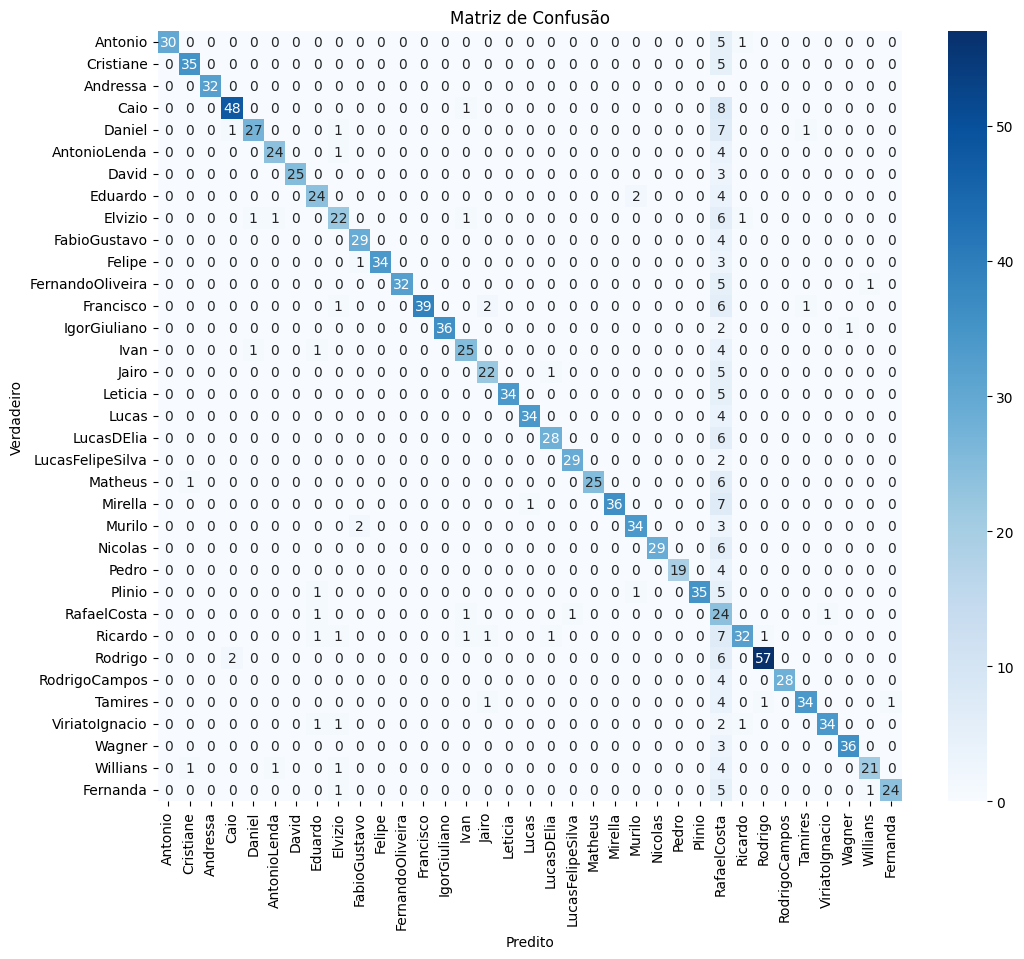

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Mapear os rótulos numéricos para nomes de pessoas
# Usar o dicionário `dict_target_name` criado anteriormente
labels = [dict_target_name[i] for i in sorted(np.unique(np.concatenate((y_test, y_pred))))]

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Salvar o modelo SVM treinado em um arquivo .pkl
model_save_path = '/content/drive/MyDrive/AprendizadoMaquinasI/2025/SVM_Model/'

# Verifica se o diretório existe, se não, cria
os.makedirs(model_save_path, exist_ok=True)

# O modelo treinado com os melhores parâmetros do GridSearchCV é grid_search.best_estimator_
best_svm_model = grid_search.best_estimator_

# Salvar o modelo usando pickle
with open(model_save_path + 'best_svm_model.pkl', 'wb') as f:
    pk.dump(best_svm_model, f)

print(f"Modelo SVM treinado salvo em: {model_save_path + 'best_svm_model.pkl'}")


Modelo SVM treinado salvo em: /content/drive/MyDrive/AprendizadoMaquinasI/2025/SVM_Model/best_svm_model.pkl


# Inferencia

A partir dos modelos criados, cria-se um pipeline de inferencia, para a escoragem de novas imagens obtidas pela camera do notebook.

In [ ]:
def tirar_foto(quality=0.8, texto_botao="Capturar"):
  js = Javascript('''
    async function takePhoto(qual, texto) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = texto;
      div.appendChild(capture);

      // Abre a câmera
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      // Mostra a saída da câmera
      const video = document.createElement('video');
      video.style.display = 'block';
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', qual);
    }
    ''')
  display(js)
  return eval_js('takePhoto({}, "{}")'.format(quality, texto_botao))

try:
  imagem_urlb64 = tirar_foto()
  imbytes = b64decode(imagem_urlb64.split(',')[1])
  im = cv2.imdecode(np.frombuffer(imbytes, dtype=np.uint8), flags=1)
  plt.imshow(im, cmap='gray'),plt.title('Imagem capturada')
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# Carregar o objeto PCA salvo
save_path = '/content/drive/MyDrive/AprendizadoMaquinasI/2025/PCA_Results/'

try:
    with open(save_path + 'pca_model.pkl', 'rb') as f:
        pca = pk.load(f)
    print("Objeto PCA carregado com sucesso!")
    print(f"Número de componentes carregados: {pca.n_components_}")
except FileNotFoundError:
    print(f"Erro: O arquivo 'pca_model.pkl' não foi encontrado no diretório {save_path}")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o objeto PCA: {e}")

In [ ]:
# Carregar o modelo SVM treinado
model_save_path = '/content/drive/MyDrive/AprendizadoMaquinasI/2025/SVM_Model/'

try:
    with open(model_save_path + 'best_svm_model.pkl', 'rb') as f:
        best_svm_model = pk.load(f)
    print("Modelo SVM treinado carregado com sucesso!")
except FileNotFoundError:
    print(f"Erro: O arquivo 'best_svm_model.pkl' não foi encontrado no diretório {model_save_path}")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o modelo SVM: {e}")

In [ ]:
# Ensure the captured image is in the correct format (grayscale, resized)
# Assuming 'im' from the try block of tirar_foto is the captured image

# Convert to grayscale if not already
if len(im.shape) == 3:
    im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
else:
    im_gray = im

# Resize to the dimensions used for training (altura_lfw, largura_lfw)
# Use INTER_AREA for shrinking, INTER_CUBIC or INTER_LINEAR for zooming
resized_im = cv2.resize(im_gray, (largura_lfw, altura_lfw), interpolation=cv2.INTER_AREA)

# Normalize the pixel values
normalized_im = resized_im.astype('float32') / 255.0

# Flatten the image to a 1D vector and reshape for PCA
flattened_im = normalized_im.flatten().reshape(1, -1)

# Apply PCA transformation
# Make sure the pca object is loaded in the previous cell
try:
    image_pca = pca.transform(flattened_im)

    # Predict the identity using the trained SVM model
    # Make sure the best_svm_model object is loaded in the previous cell
    predicted_target = best_svm_model.predict(image_pca)

    # Get the predicted name using the dictionary
    # Make sure the dict_target_name is available
    if predicted_target[0] in dict_target_name:
        predicted_name = dict_target_name[predicted_target[0]]
        print(f"A pessoa na imagem é: {predicted_name}")
    else:
        print(f"Não foi possível identificar a pessoa (target: {predicted_target[0]})")

except NameError as e:
    print(f"Erro: Uma variável necessária (pca, best_svm_model, or dict_target_name) não foi carregada. Detalhes: {e}")
except Exception as e:
    print(f"Ocorreu um erro durante a classificação: {e}")